[**Demo %s**](#demo-diffmats-cheb)

Here is a $4\times 4$ Chebyshev differentiation matrix.

In [2]:
[t, Dx] = diffcheb(3, [-1, 1]);
format rat
Dx

Dx = 
     -19/6            4             -4/3            1/2     
      -1              1/3            1             -1/3     
       1/3           -1             -1/3            1       
      -1/2            4/3           -4             19/6

We again test the convergence rate.

In [3]:
f = @(x) x + exp(sin(4*x));
df_dx = @(x) 1 + 4 * exp(sin(4*x)) .* cos(4*x);
d2f_dx2 = @(x) 4 * exp(sin(4*x)) .* (4*cos(4*x).^2 - 4*sin(4*x));


In [4]:
n = 5:5:70;
err = zeros(length(n), 2);
for k = 1:length(n)
    [t, Dx, Dxx] = diffcheb(n(k), [-1, 1]);
    y = f(t);
    err(k, 1) = norm(df_dx(t) - Dx * y, Inf);
    err(k, 2) = norm(d2f_dx2(t) - Dxx * y, Inf);
end

Since we expect a spectral convergence rate, we use a semi-log plot for the error.

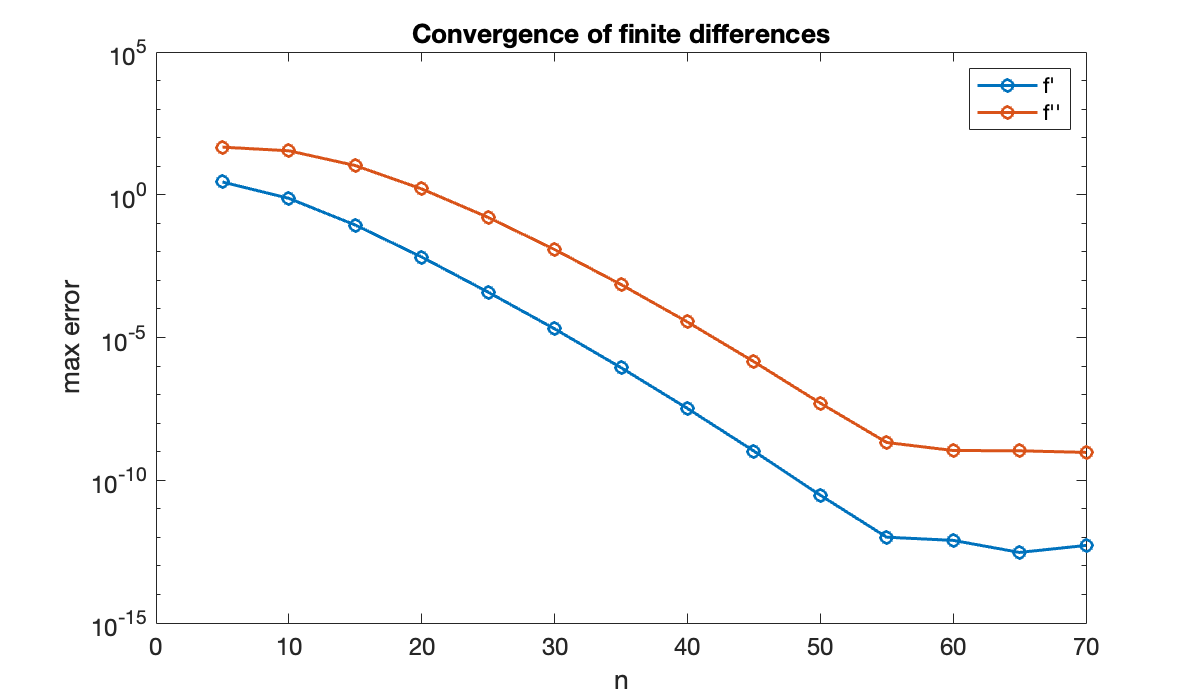

In [5]:
clf,  format
semilogy(n, err, 'o-'), hold on
legend("f'", "f''")
xlabel('n'),  ylabel('max error')
title('Convergence of finite differences')